<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [6]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [7]:
data.files

['arr_0', 'arr_1']

In [8]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

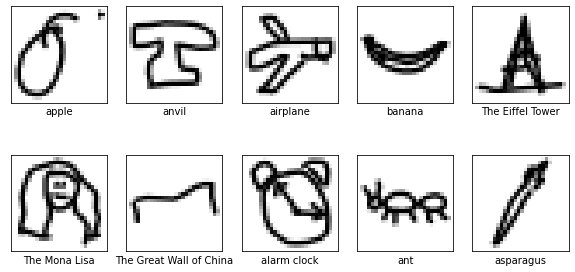

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [10]:
X.shape

(100000, 784)

In [11]:
y.shape

(100000,)

In [12]:
X.max()

255

In [13]:
# Normalize X Data

X = X.astype('float')/255

In [14]:
X.max()

1.0

In [15]:
X.shape

(100000, 784)

In [16]:
class_names

['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

In [17]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [18]:
X.max()

1.0

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



## The Process

- Load Data
- Define Model
- Compile Model
- Fit Model
- Evaluate Model

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [20]:
X_train.shape

(67000, 784)

In [21]:
import tensorflow as tf


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation = 'sigmoid'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
baseline = model.fit(X_train, y_train, epochs = 30, validation_data=(X_train, y_train))

Epoch 1/30
2094/2094 [==============================] - 3s 2ms/step - loss: 1.4590 - accuracy: 0.5417 - val_loss: 0.9949 - val_accuracy: 0.7104
Epoch 2/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.9854 - accuracy: 0.7153 - val_loss: 0.9366 - val_accuracy: 0.7296
Epoch 3/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.9305 - accuracy: 0.7322 - val_loss: 0.9124 - val_accuracy: 0.7360
Epoch 4/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.9031 - accuracy: 0.7414 - val_loss: 0.8962 - val_accuracy: 0.7432
Epoch 5/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8963 - accuracy: 0.7429 - val_loss: 0.8845 - val_accuracy: 0.7480
Epoch 6/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8916 - accuracy: 0.7459 - val_loss: 0.8773 - val_accuracy: 0.7484
Epoch 7/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8797 - accuracy: 0.7486 - val_loss: 0.8726 - val_accuracy:

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [47]:
baseline

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [48]:
baseline.history

{'loss': [1.1994839906692505,
  0.9637940526008606,
  0.9255771040916443,
  0.906510591506958,
  0.8939223289489746,
  0.88466477394104,
  0.8773022294044495,
  0.8717671632766724,
  0.8667863011360168,
  0.8626323938369751,
  0.8589627146720886,
  0.8559545874595642,
  0.8532594442367554,
  0.8508772850036621,
  0.8484765291213989,
  0.8466300368309021,
  0.844797670841217,
  0.8431757688522339,
  0.8416776657104492,
  0.8402442336082458,
  0.8389979004859924,
  0.8380864262580872,
  0.8367462754249573,
  0.8357896208763123,
  0.8348200917243958,
  0.8337517976760864,
  0.8330643773078918,
  0.832443118095398,
  0.8315649628639221,
  0.8310608863830566],
 'accuracy': [0.6413581967353821,
  0.7211194038391113,
  0.7329850792884827,
  0.7408358454704285,
  0.7437313199043274,
  0.7470895648002625,
  0.7500447630882263,
  0.7514626979827881,
  0.7530447840690613,
  0.7539850473403931,
  0.7553582191467285,
  0.757044792175293,
  0.7568358182907104,
  0.7578209042549133,
  0.7582686543464

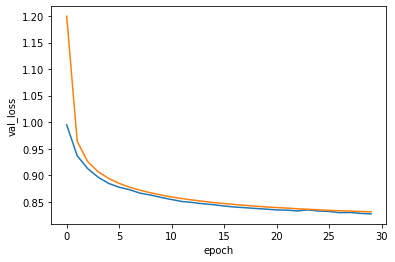

In [49]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);


## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [50]:
from tensorflow.keras.optimizers import Adam

model_b = Sequential()
model_b.add(Dense(10, input_dim=784, activation = 'sigmoid'))
model_b.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
baseline_b = model.fit(X_train, y_train, epochs = 30, validation_data=(X_train, y_train))

Epoch 1/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.8302 - accuracy: 0.7649 - val_loss: 0.8263 - val_accuracy: 0.7667
Epoch 2/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8298 - accuracy: 0.7654 - val_loss: 0.8300 - val_accuracy: 0.7588
Epoch 3/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8291 - accuracy: 0.7653 - val_loss: 0.8261 - val_accuracy: 0.7670
Epoch 4/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8285 - accuracy: 0.7648 - val_loss: 0.8257 - val_accuracy: 0.7670
Epoch 5/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8279 - accuracy: 0.7655 - val_loss: 0.8249 - val_accuracy: 0.7658
Epoch 6/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8276 - accuracy: 0.7653 - val_loss: 0.8237 - val_accuracy: 0.7681
Epoch 7/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8269 - accuracy: 0.7650 - val_loss: 0.8232 - val_accuracy:

In [ ]:
df = pd.DataFrame.from_records(baseline_b.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
    - "The purpose of loss functions is to compute the quantity that a model should seek to minimize during training". I think the binary_crossentropy function could be best suited since it is designed for only two categorical outputs
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
    - Metrics are used to judge performance. Metrics are reported after the model is made while loss functions help to build a better model while it is being made
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 
    - They build on earlier models

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)